#構造変化、理論の妥当性のテスト
『Rによる計量経済学』第9章「構造変化、理論の妥当性のテスト」をPythonで実行する。  
テキスト付属データセット(「k0901.csv」等)については出版社サイトよりダウンロードしてください。  
また、以下の説明は本書の一部を要約したものですので、より詳しい説明は本書を参照してください。   

##ダミー変数(Dummy Variable)
###例題9.1「定数項ダミー」
以下のようにモデルを設定して回帰分析を行う。  
$Y_{i} = \alpha + \beta X_{i} + \gamma D_{i} + u_{i}$

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# データ読み込み
data = pd.read_csv('example/k0901.csv')
data

,i,X,Y,D
0,1,1,2,0
1,2,2,5,1
2,3,3,7,1
3,4,4,3,0
4,5,5,7,1
5,6,6,5,0
6,7,7,9,1
7,8,8,5,0
8,9,9,7,0
9,10,10,10,1


In [4]:
# 説明変数設定
X = data[['X', 'D']]
X = sm.add_constant(X)
X

,const,X,D
0,1,1,0
1,1,2,1
2,1,3,1
3,1,4,0
4,1,5,1
5,1,6,0
6,1,7,1
7,1,8,0
8,1,9,0
9,1,10,1


In [5]:
# 被説明変数設定
Y = data['Y']
Y

0     2
1     5
2     7
3     3
4     7
5     5
6     9
7     5
8     7
9    10
Name: Y, dtype: int64

In [6]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     64.02
Date:                Sun, 19 Jul 2015   Prob (F-statistic):           3.17e-05
Time:                        04:03:42   Log-Likelihood:                -8.0050
No. Observations:                  10   AIC:                             22.01
Df Residuals:                       7   BIC:                             22.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1650      0.491      2.374      0.0

In [7]:
# ダミー別データ
data_d0 = data[data["D"] == 0]
data_d1 = data[data["D"] == 1]

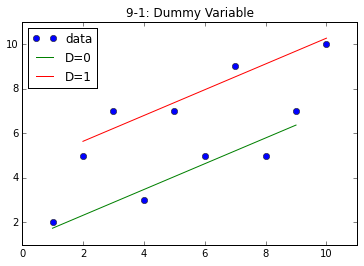

In [8]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data_d0.X, results.fittedvalues[data_d0.index], label="D=0")
plt.plot(data_d1.X, results.fittedvalues[data_d1.index], label="D=1")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('9-1: Dummy Variable')
plt.legend(loc=2)
plt.show()

###例題9-2 「係数ダミー」
以下のようにモデルを設定して回帰分析を行う。  
$Y_{i} = \alpha + \beta X_{i} + \gamma D_{i} + \delta D_{i} X_{i} + u_{i}$ 

In [9]:
# データ読み込み
data = pd.read_csv('example/k0902.csv')
data

,i,X,Y,D,DX
0,1,1,1.0,0,0
1,2,2,1.5,0,0
2,3,3,5.0,0,0
3,4,4,7.0,0,0
4,5,5,7.5,0,0
5,6,6,7.0,1,6
6,7,7,7.5,1,7
7,8,8,7.2,1,8
8,9,9,7.0,1,9
9,10,10,8.4,1,10


In [10]:
# 説明変数設定
X = data[['X', 'D', 'DX']]
X = sm.add_constant(X)
X

,const,X,D,DX
0,1,1,0,0
1,1,2,0,0
2,1,3,0,0
3,1,4,0,0
4,1,5,0,0
5,1,6,1,6
6,1,7,1,7
7,1,8,1,8
8,1,9,1,9
9,1,10,1,10


In [11]:
# 被説明変数設定
Y = data['Y']
Y

0    1.0
1    1.5
2    5.0
3    7.0
4    7.5
5    7.0
6    7.5
7    7.2
8    7.0
9    8.4
Name: Y, dtype: float64

In [12]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     34.73
Date:                Sun, 19 Jul 2015   Prob (F-statistic):           0.000346
Time:                        04:03:43   Log-Likelihood:                -8.6672
No. Observations:                  10   AIC:                             25.33
Df Residuals:                       6   BIC:                             26.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.1500      0.779     -1.475      0.1

In [13]:
# ダミー別データ
data_d0 = data[data["D"] == 0]
data_d1 = data[data["D"] == 1]

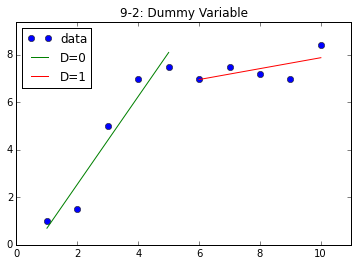

In [14]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data_d0.X, results.fittedvalues[data_d0.index], label="D=0")
plt.plot(data_d1.X, results.fittedvalues[data_d1.index], label="D=1")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('9-2: Dummy Variable')
plt.legend(loc=2)
plt.show()

###例題9-3 「t検定による構造変化のテスト」
例題9-2において$\gamma = 0$に関するP値は0.017であり、$\delta = 0$に関するP値は0.003であることから、標準的な有意水準を設定すれば、いずれのダミー変数も有意であるといえる。

###例題9-4 「F検定による構造変化のテスト」

In [15]:
# ダミー変数を加えない時のOLSモデル作成
X = data[['X']]
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()

In [16]:
# anova(Analysis of Variance)
print(sm.stats.anova_lm(results2, results))

   df_resid        ssr  df_diff    ss_diff          F   Pr(>F)
0         8  19.316242        0        NaN        NaN      NaN
1         6   3.314000        2  16.002242  14.486037  0.00505


F値は14.486、それに対応するP値は0.005より $\gamma$ , $\delta$ のうち少なくとも1つは0ではないと分かる。